In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [8]:
data=pd.read_csv('cities_r2.csv')
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [9]:
from sklearn.preprocessing import StandardScaler
data=data.replace(np.nan,0)
#data['total_graduates'].fillna(data['total_graduates'].mean(), inplace=True)

# Standardize the feature for better performance in K-Means
scaler = StandardScaler()
data['total_graduates_scaled'] = scaler.fit_transform(data[['total_graduates']])


#data['population_total'].fillna(data['population_total'].mean(), inplace=True)

# Standardize the feature for better performance in K-Means
scaler = StandardScaler()
data['total_p_scaled'] = scaler.fit_transform(data[['population_total']])
x=data[['total_graduates_scaled','total_p_scaled']].values

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


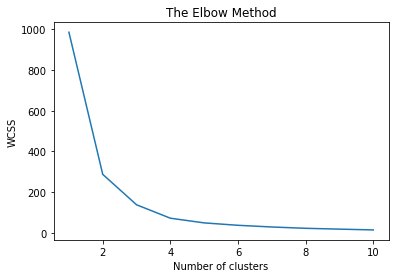

In [10]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

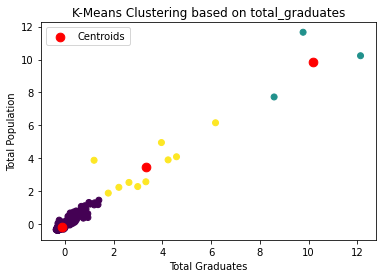

In [11]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)
kmeans.fit(x)
labels=kmeans.labels_

centroids=kmeans.cluster_centers_
#Visualize the clusters
plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], marker='.', s=300, c='red', label='Centroids')
plt.title('K-Means Clustering based on total_graduates')
plt.xlabel('Total Graduates')
plt.ylabel('Total Population')
plt.legend()
plt.show()



In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, labels)
silhouette_avg

0.9069624197031768

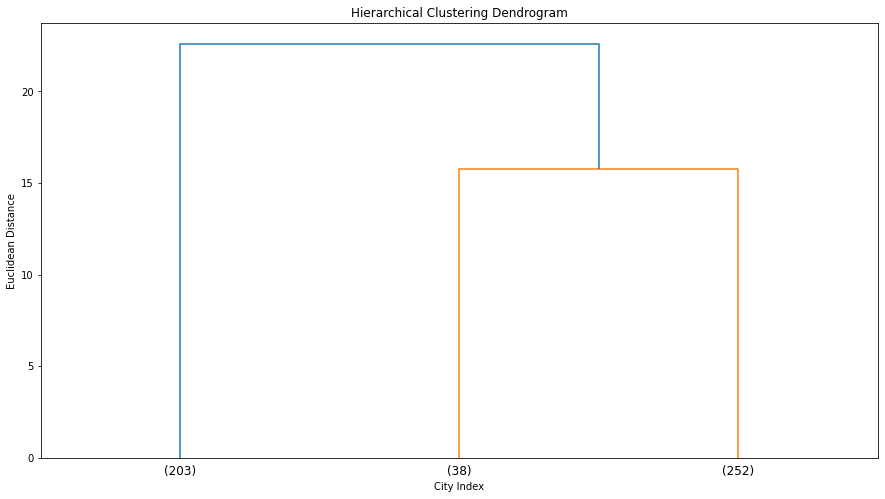

In [13]:
#Hierarchial Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
scaler = StandardScaler()
data['effective_literacy_rate_total_scaled'] = scaler.fit_transform(data[['effective_literacy_rate_total']])

# Select the feature for clustering
z = data[['effective_literacy_rate_total_scaled']]

# Apply hierarchical clustering
linked = linkage(z, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True, truncate_mode='lastp', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('City Index')
plt.ylabel('Euclidean Distance')
plt.show()


In [15]:
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(linked, pdist(z))
print(f'Cophenetic Correlation Coefficient: {c}')

Cophenetic Correlation Coefficient: 0.5488151183248162
